<a href="https://colab.research.google.com/github/laraimad/Machine-learning-assignment-/blob/main/Bilharzial_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path='/content/drive/MyDrive/mldata0.xlsx'
df = pd.read_excel(file_path, sheet_name=5)
df.head()

/usr/local/lib/python3.11/dist-packages/openpyxl/reader/workbook.py:102: UserWarning: Defined names for sheet index 19 cannot be located
  warn(f"Defined names for sheet index {idx} cannot be located")
/usr/local/lib/python3.11/dist-packages/openpyxl/reader/workbook.py:102: UserWarning: Defined names for sheet index 12 cannot be located
  warn(f"Defined names for sheet index {idx} cannot be located")


,Year,cases,Urinary %,Intestinal %,Mixed %,Male,Female,Saudi,NonSaudi
0,2017.0,103.0,34.00,66.00,0,96.10,3.90,22.30,77.70
1,2018.0,96.0,9.40,90.60,0,92.70,7.30,27.10,72.90
2,2019.0,47.0,19.10,80.85,0,85.10,14.90,25.50,74.50
3,2020.0,39.0,20.51,79.48,0,84.60,15.40,33.33,66.67
4,2021.0,71.0,28.17,71.83,0,81.69,18.31,26.76,73.24


In [ ]:
print(df.columns)


Index(['Year', ' cases', 'Urinary %  ', 'Intestinal % ', 'Mixed % ', 'Male',
       'Female', 'Saudi', 'NonSaudi'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip().str.lower()


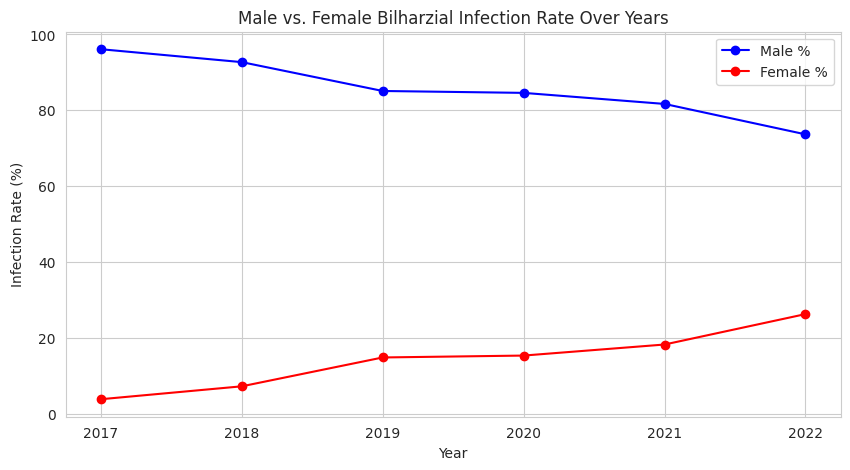

In [ ]:
sns.set_style("whitegrid")


plt.figure(figsize=(10, 5))
plt.plot(df["year"], df["male"], marker="o", linestyle="-", label="Male %", color="blue")
plt.plot(df["year"], df["female"], marker="o", linestyle="-", label="Female %", color="red")

plt.xlabel("Year")
plt.ylabel("Infection Rate (%)")
plt.title("Male vs. Female Bilharzial Infection Rate Over Years")
plt.legend()
plt.xticks(pd.to_numeric(df["year"], errors='coerce').dropna())
plt.show()



<ipython-input-20-8632ddf10c63>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["year"], y=df['cases'], palette="viridis")


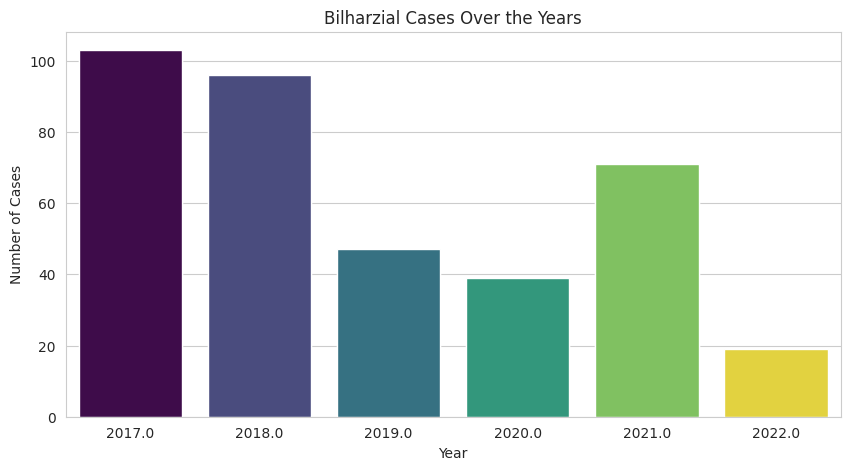

In [ ]:
# Plot Cases per Year
plt.figure(figsize=(10, 5))
sns.barplot(x=df["year"], y=df["cases"], hue=df["year"], palette="viridis", legend=False)

plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.title("Bilharzial Cases Over the Years")
plt.show()

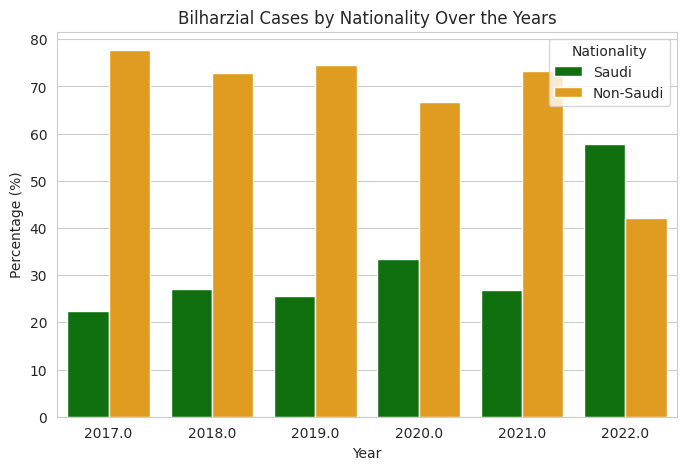

In [ ]:
plt.figure(figsize=(8, 5))

df_nationality = df[['year', 'saudi', 'nonsaudi']].melt(id_vars=["year"], var_name="Nationality", value_name="Percentage")

palette_colors = {"saudi": "green", "nonsaudi": "orange"}

sns.barplot(x="year", y="Percentage", hue="Nationality", data=df_nationality, palette=palette_colors)

plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.title("Bilharzial Cases by Nationality Over the Years")


handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["Saudi", "Non-Saudi"], title="Nationality")

plt.show()


In [ ]:
df2 = pd.read_excel(file_path, sheet_name=6)
df2

/usr/local/lib/python3.11/dist-packages/openpyxl/reader/workbook.py:102: UserWarning: Defined names for sheet index 19 cannot be located
  warn(f"Defined names for sheet index {idx} cannot be located")
/usr/local/lib/python3.11/dist-packages/openpyxl/reader/workbook.py:102: UserWarning: Defined names for sheet index 12 cannot be located
  warn(f"Defined names for sheet index {idx} cannot be located")


,HealthRegion,No.Examined,No.Cases,No.Positive,Urinary,Intestinal,Mixed,SaudiMale,SaudiFemale,SaudiTotal,NonSaudiMale,NonSaudiFemale,NonSaudiTotal,AgeUnder5,Age5-15,Age15-40,Age40plus
0,Central Region,2069,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Westren Region,116440,5,0.009000,0,5,0,1,2,3,1,1,2,1,2,2,0
2,Eastern Region,16776,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Southren Region,186054,14,0.024000,10,2,2,6,2,8,6,0,6,0,3,9,2
4,Northren Region,261446,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Total,321339,19,0.005913,10,7,2,7,4,11,7,1,8,1,5,11,2


In [ ]:
# One-Hot Encode the 'Health_Region' column
df2 = pd.get_dummies(df2, columns=['HealthRegion'], drop_first=True)


df2.head()


,No.Examined,No.Cases,No.Positive,Urinary,Intestinal,Mixed,SaudiMale,SaudiFemale,SaudiTotal,NonSaudiMale,...,NonSaudiTotal,AgeUnder5,Age5-15,Age15-40,Age40plus,HealthRegion_Eastern Region,HealthRegion_Northren Region,HealthRegion_Southren Region,HealthRegion_Total,HealthRegion_Westren Region
0,2069,0,0.000,0,0,0,0,0,0,0,...,0,0,0,0,0,False,False,False,False,False
1,116440,5,0.009,0,5,0,1,2,3,1,...,2,1,2,2,0,False,False,False,False,True
2,16776,0,0.000,0,0,0,0,0,0,0,...,0,0,0,0,0,True,False,False,False,False
3,186054,14,0.024,10,2,2,6,2,8,6,...,6,0,3,9,2,False,False,True,False,False
4,261446,0,0.000,0,0,0,0,0,0,0,...,0,0,0,0,0,False,True,False,False,False


In [ ]:
df2.columns = df2.columns.str.strip().str.lower()
df2.columns

Index(['no.examined', 'no.cases', 'no.positive', 'urinary', 'intestinal',
       'mixed', 'saudimale', 'saudifemale', 'sauditotal', 'nonsaudimale',
       'nonsaudifemale', 'nonsauditotal', 'ageunder5', 'age5-15', 'age15-40',
       'age40plus', 'healthregion_eastern region',
       'healthregion_northren region', 'healthregion_southren region',
       'healthregion_total', 'healthregion_westren region'],
      dtype='object')

In [ ]:
# Define features (X) and target variable (Y)
X = df2.drop(columns=['no.cases'])
Y = df2['no.cases']  # Target variable

In [ ]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)


In [ ]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(Xs, Y, test_size=0.2, random_state=42)

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=300, random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)


    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    results.append([name, mae, mse, r2])


results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "R-Squared"])
print(results_df)

                         Model       MAE       MSE  R-Squared
0            Linear Regression  1.044742  1.226677   0.803732
1      Random Forest Regressor  0.785000  0.676250   0.891800
2  Gradient Boosting Regressor  0.252382  0.127394   0.979617


In [ ]:


kf = KFold(n_splits=3, shuffle=True, random_state=42)

cv_results = []
for name, model in models.items():
    scores = cross_val_score(model, Xs, Y, cv=kf, scoring='r2')
    cv_results.append([name, scores.mean(), scores.std()])

cv_results_df = pd.DataFrame(cv_results, columns=["Model", "Mean R-Squared", "Std Dev R-Squared"])
print(cv_results_df)

                         Model  Mean R-Squared  Std Dev R-Squared
0            Linear Regression        0.873289           0.053225
1      Random Forest Regressor        0.732304           0.188786
2  Gradient Boosting Regressor        0.929446           0.073628


In [ ]:
gbr = GradientBoostingRegressor(n_estimators=300, random_state=42)


In [ ]:

region_columns = [col for col in df2.columns if "healthregion_" in col]

# Convert one-hot encoding back to original labels
df2["HealthRegion"] = df2[region_columns].idxmax(axis=1).str.replace("healthregion_", "").str.strip()


In [ ]:
gbr.fit(X_train, Y_train)

Y_pred_all = gbr.predict(Xs)

# Create a DataFrame with actual vs predicted values
predictions_df = pd.DataFrame({
    "HealthRegion": df2["HealthRegion"],  # Use the reconstructed region names
    "Actual No. Cases": Y,
    "Predicted No. Cases": Y_pred_all.round(2)  # Rounded predictions
})
print (predictions_df)


      HealthRegion  Actual No. Cases  Predicted No. Cases
0   eastern region                 0                  0.0
1   westren region                 5                  4.5
2   eastern region                 0                  0.0
3  southren region                14                 14.0
4  northren region                 0                  0.0
5            total                19                 19.0
